In [ ]:
!pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 62.2 MB/s eta 0:00:00


In [ ]:
# Importing necessary packages for data cleaning, visualization, and EDA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz as sv
from sklearn.model_selection import train_test_split
import warnings
from scipy import stats

In [ ]:

# Suppressing warnings for cleaner output
warnings.filterwarnings("ignore")

# Task 1: Data Preparation
# Reading the raw CSV data file
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Initial Data Overview
print("Initial Data Overview:")
print(df.info())
print("\nInitial Data Description:")
print(df.describe())

Initial Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7

In [ ]:

# Checking for missing values
print("\nMissing values in each column:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Missing values in each column:
Series([], dtype: int64)


In [ ]:

# Replacing blank spaces with NaN and handling missing values
df.replace(" ", np.nan, inplace=True)
df.dropna(inplace=True)  # Drop rows with any missing values
print("\nMissing values handled by dropping rows.")


Missing values handled by dropping rows.


In [ ]:

# After dropping rows, re-check for missing values
print("\nMissing values after cleaning:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])



Missing values after cleaning:
Series([], dtype: int64)


In [ ]:
# Mapping dictionary for categorical variables
mappings = {
    "Yes": 1, "No": 0,
    "Female": 0, "Male": 1,
    "No phone service": 2, "No internet service": 3,
    "DSL": 4, "Fiber optic": 5,
    "Month-to-month": 6, "One year": 7, "Two year": 8,
    "Electronic check": 9, "Mailed check": 10,
    "Bank transfer (automatic)": 11, "Credit card (automatic)": 12,
    " ": -1  # for missing values
}

# Apply the mappings to each column
for col in df.columns:
    df[col] = df[col].map(mappings).fillna(df[col])

In [ ]:

# Dropping the customerID column
df = df.drop(columns=['customerID'])

In [ ]:

# Outlier Detection using Z-score
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
df = df[(z_scores < 3).all(axis=1)]  # Keeping rows with z-score less than 3
print("\nOutliers detected and removed using Z-score.")



Outliers detected and removed using Z-score.


In [ ]:

# Checking the transformed DataFrame
print("\nTransformed DataFrame:")
print(df.head())



Transformed DataFrame:
   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
1       1            0.0        0           0    34.0             1   
2       1            0.0        0           0     2.0             1   
4       0            0.0        0           0     2.0             1   
5       0            0.0        0           0     8.0             1   
6       1            0.0        0           1    22.0             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
1              0                4               1             0   
2              0                4               1             1   
4              0                5               0             0   
5              1                5               0             0   
6              1                5               0             1   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
1                 1            0            0                0        

In [ ]:
# Task 2: Listing all types of data
print("\nData Types:")
print(df.dtypes)



Data Types:
gender                int64
SeniorCitizen       float64
Partner               int64
Dependents            int64
tenure              float64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object


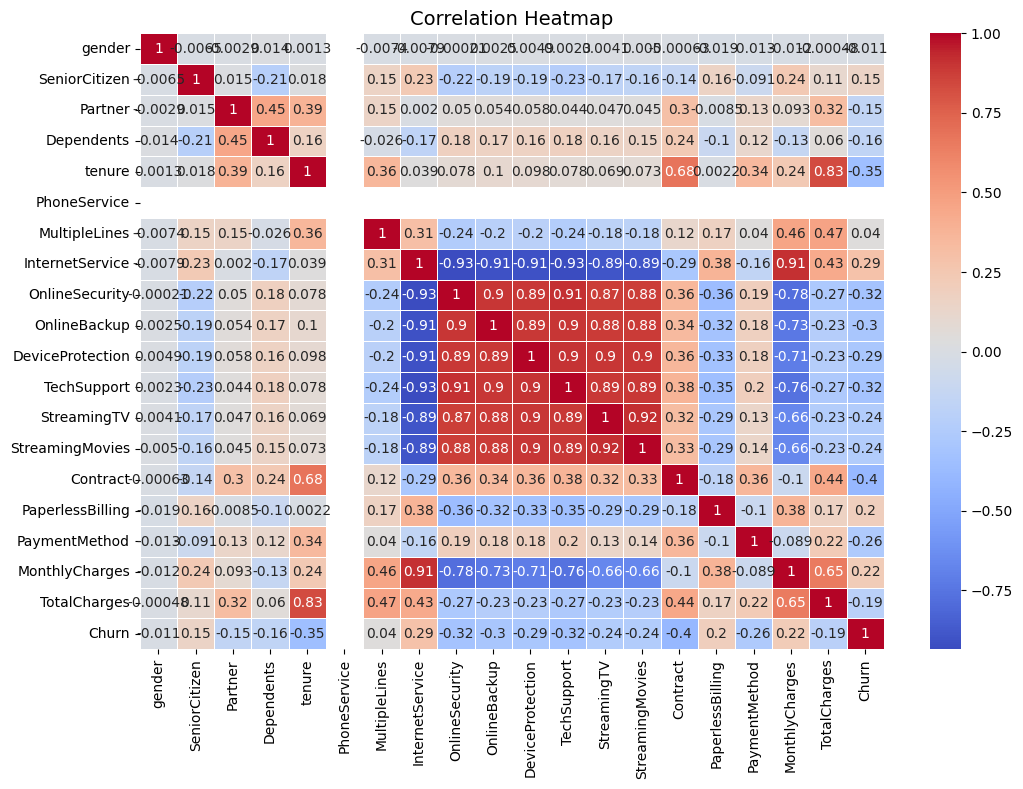

In [ ]:

# Task 3: Perform EDA
# Correlation matrix visualization
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

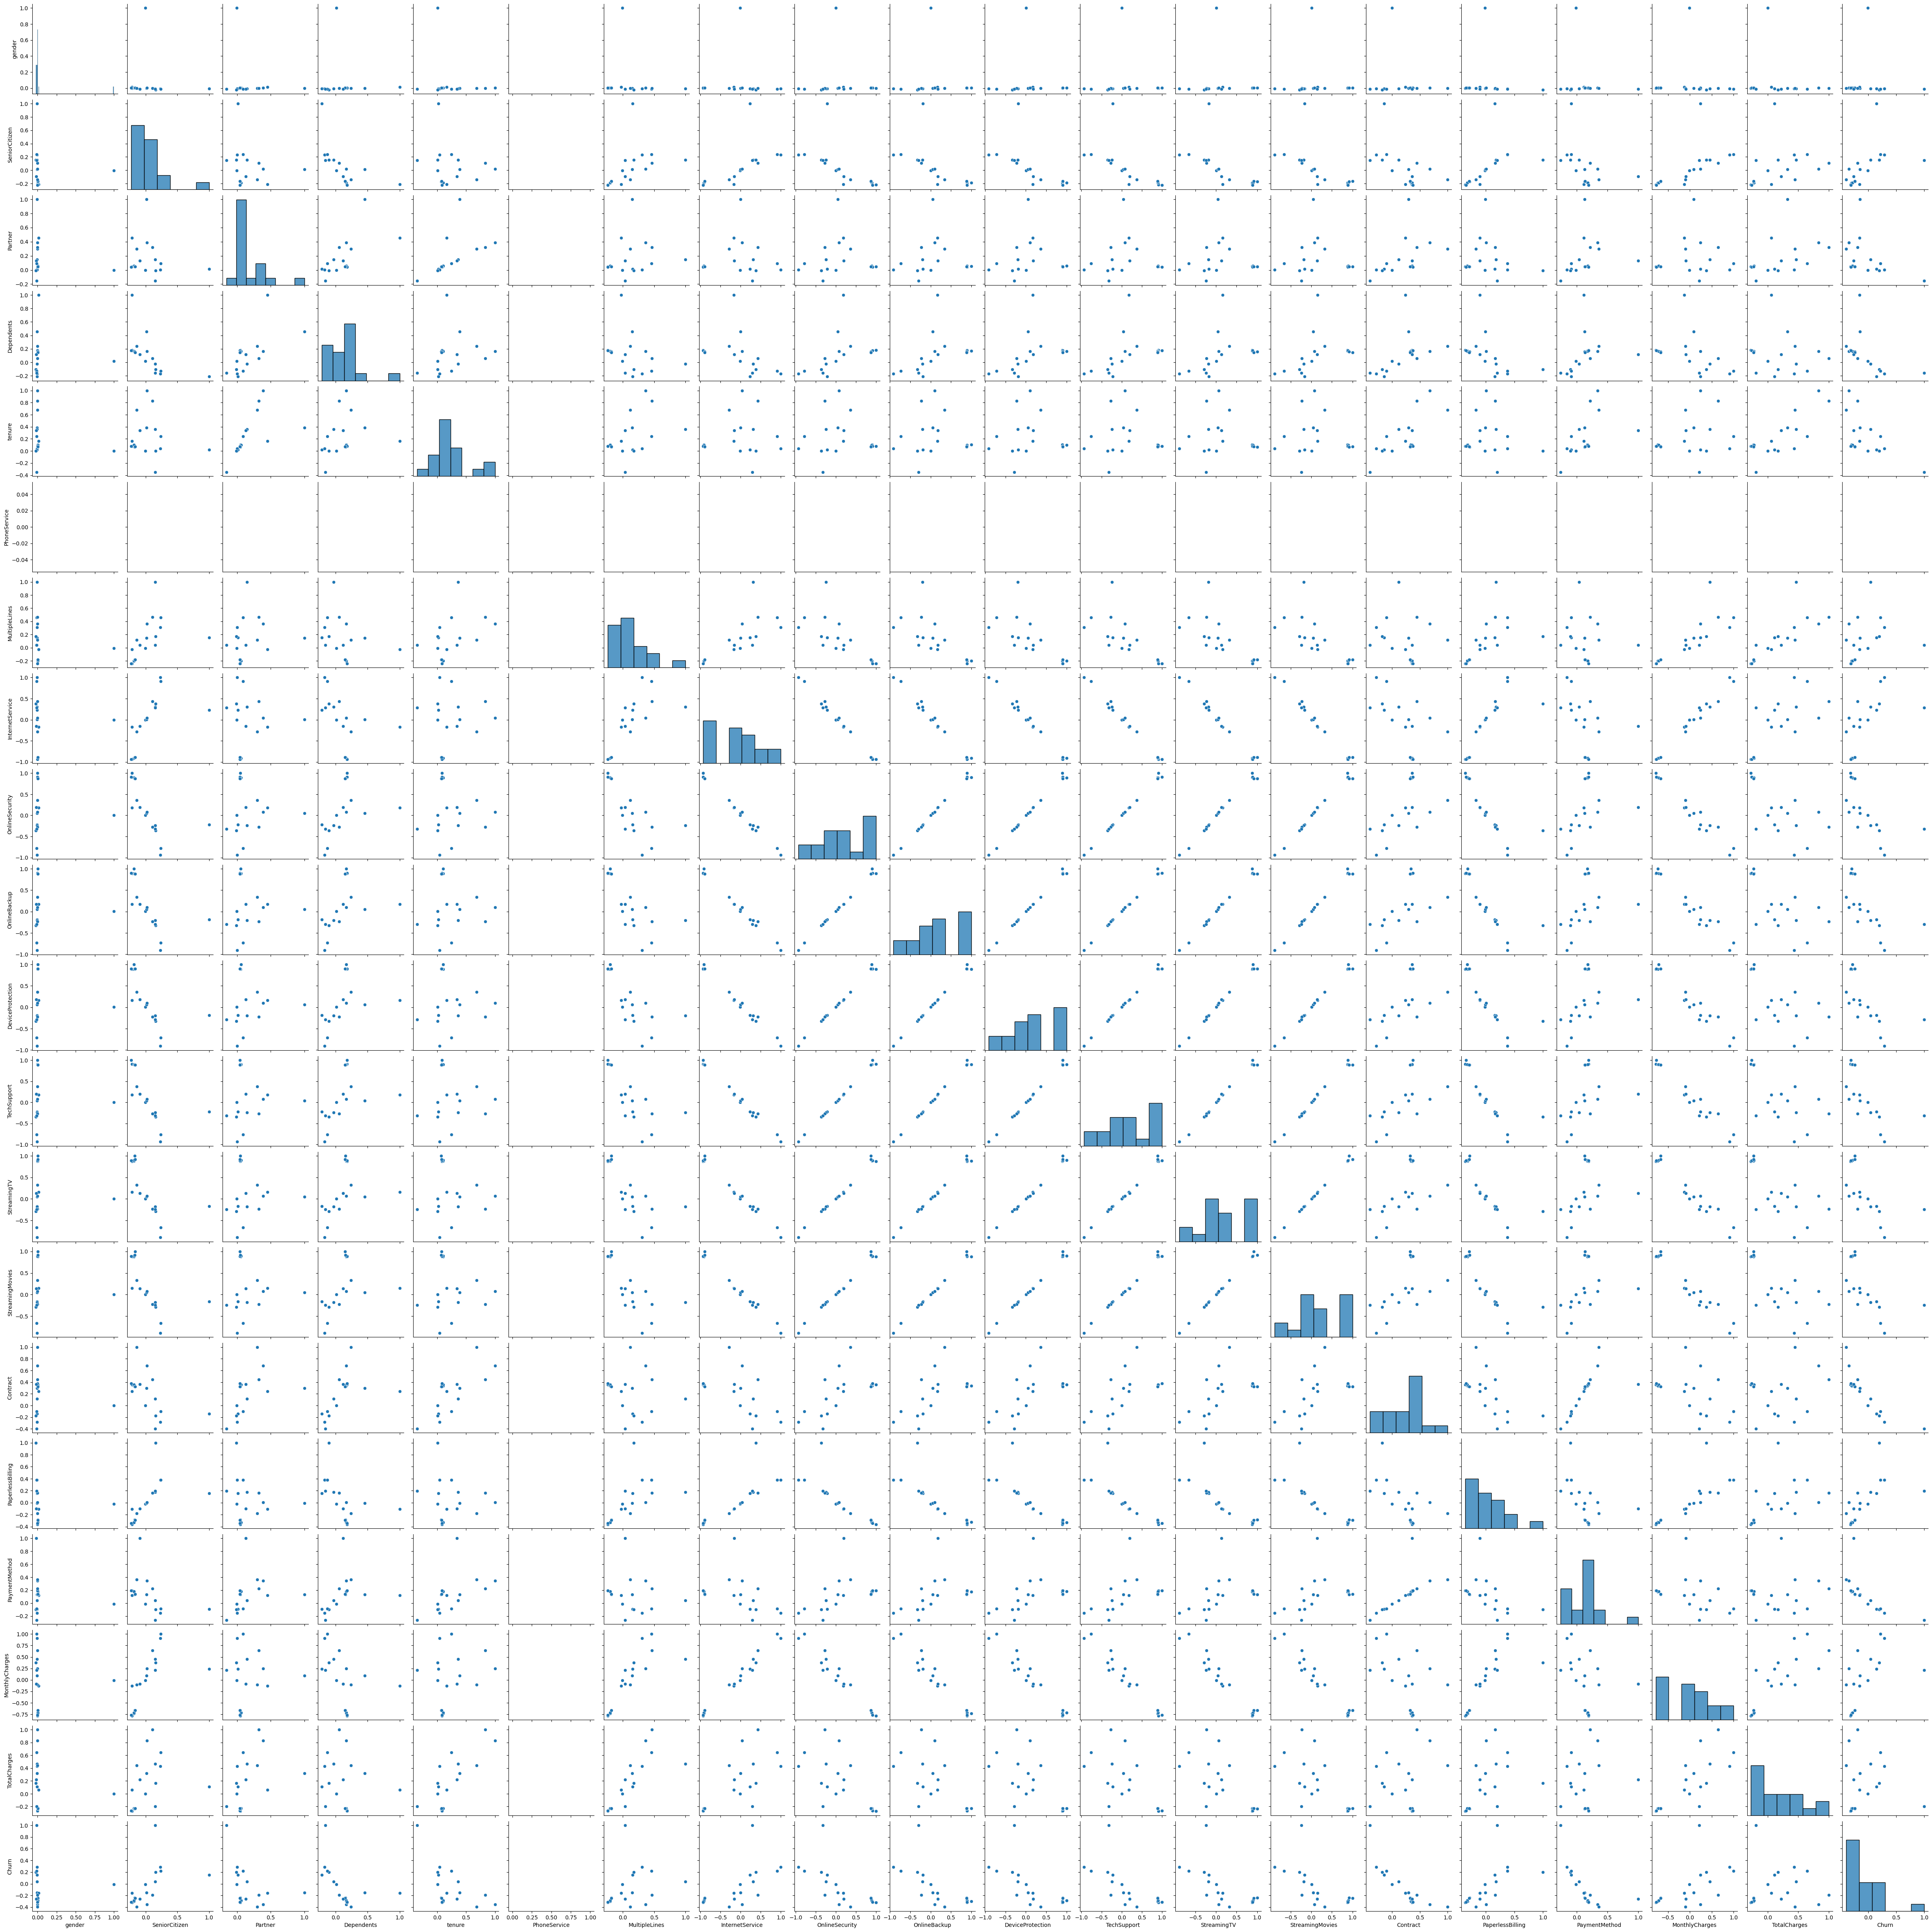

In [ ]:
sns.pairplot(corr)

<Axes: >

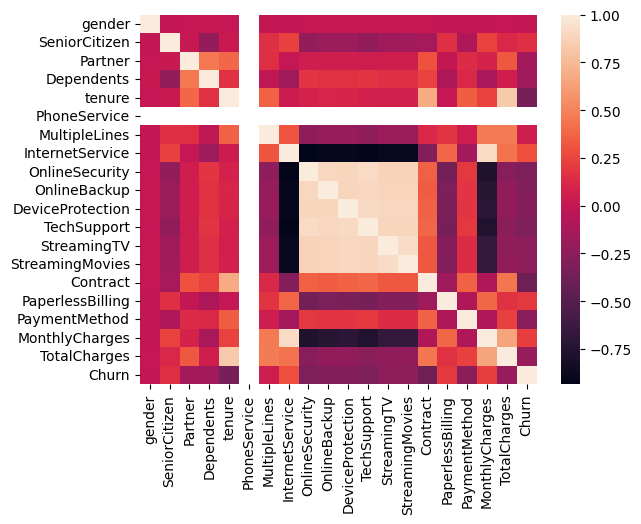

In [ ]:
sns.heatmap(corr)

In [ ]:
# Listing the most important variables affecting the target label 'Churn'
feature_importance = corr['Churn'].sort_values(ascending=False)
print("\nFeature Importance related to Churn:")
print(feature_importance)


Feature Importance related to Churn:
Churn               1.000000
InternetService     0.288777
MonthlyCharges      0.216299
PaperlessBilling    0.195949
SeniorCitizen       0.148483
MultipleLines       0.040207
gender             -0.010944
Partner            -0.154345
Dependents         -0.158476
TotalCharges       -0.194826
StreamingTV        -0.240185
StreamingMovies    -0.242718
PaymentMethod      -0.261959
DeviceProtection   -0.287498
OnlineBackup       -0.297149
TechSupport        -0.316206
OnlineSecurity     -0.319114
tenure             -0.351333
Contract           -0.396560
PhoneService             NaN
Name: Churn, dtype: float64


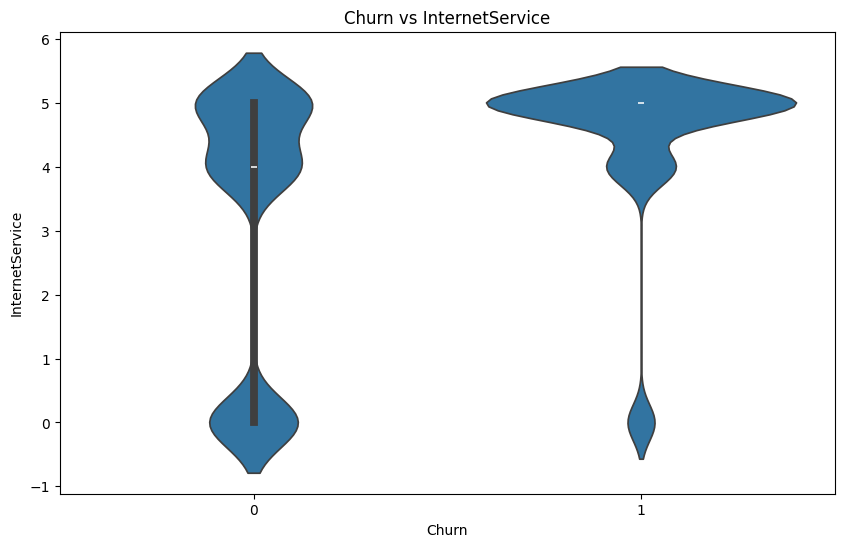

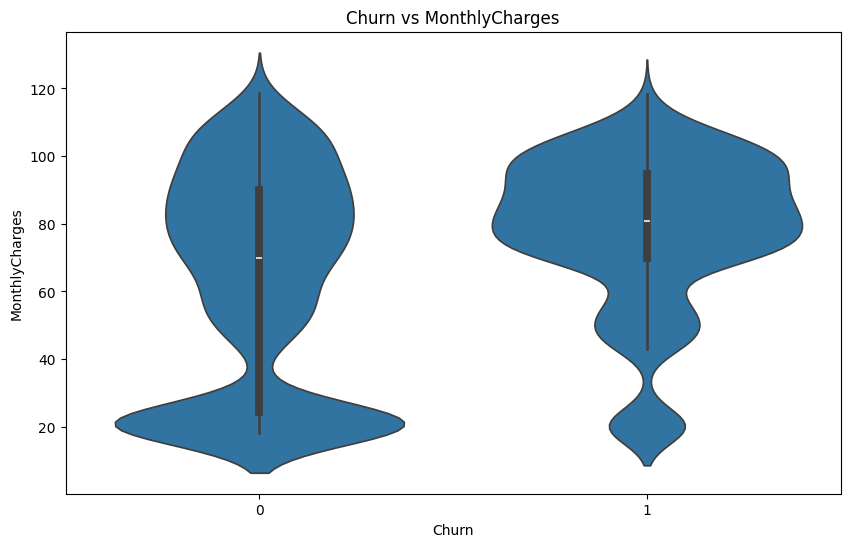

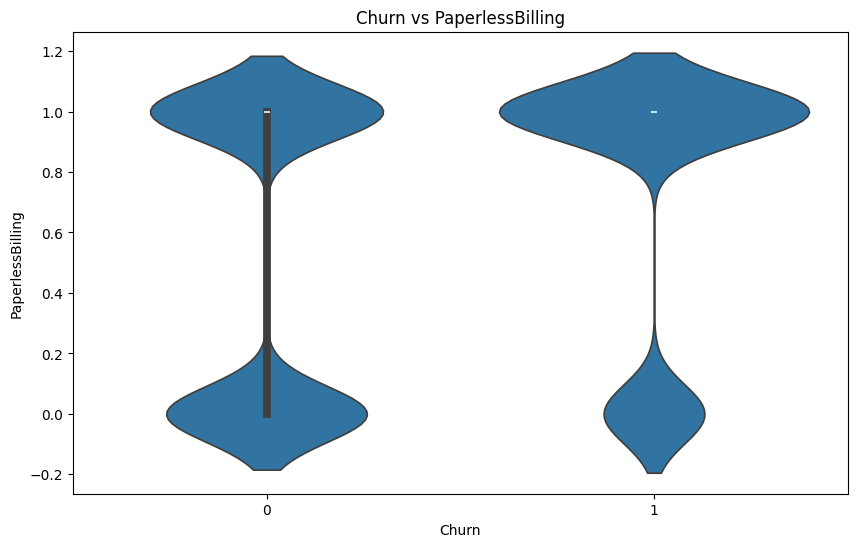

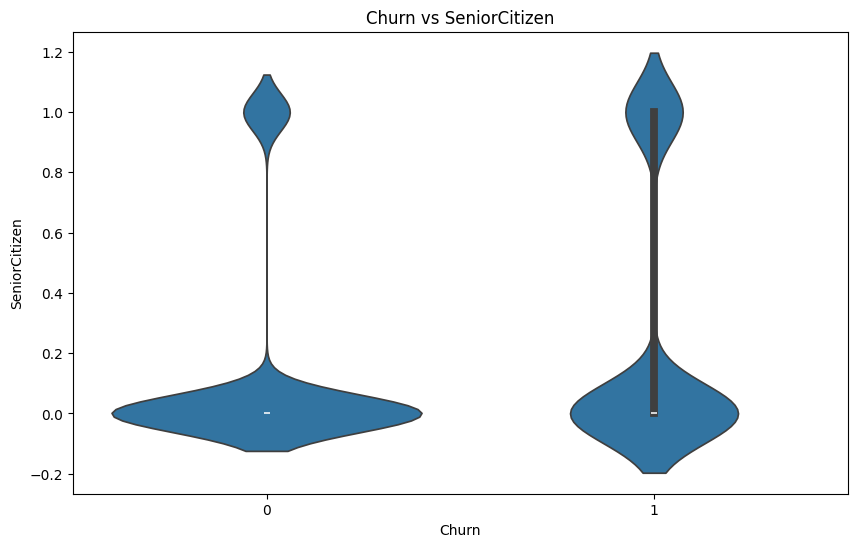

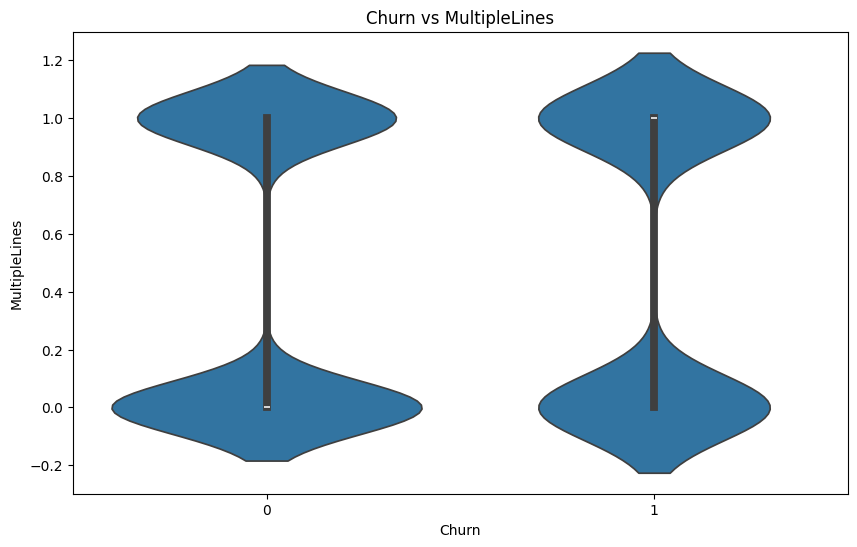

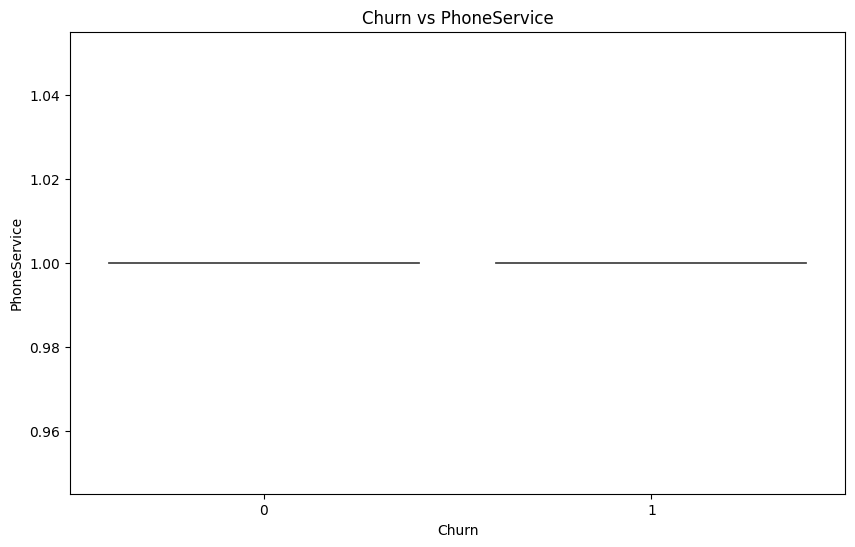

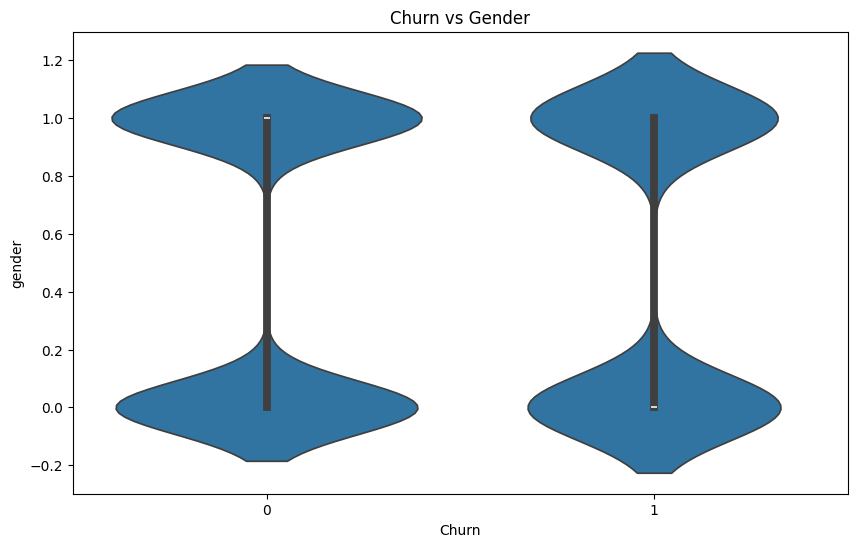

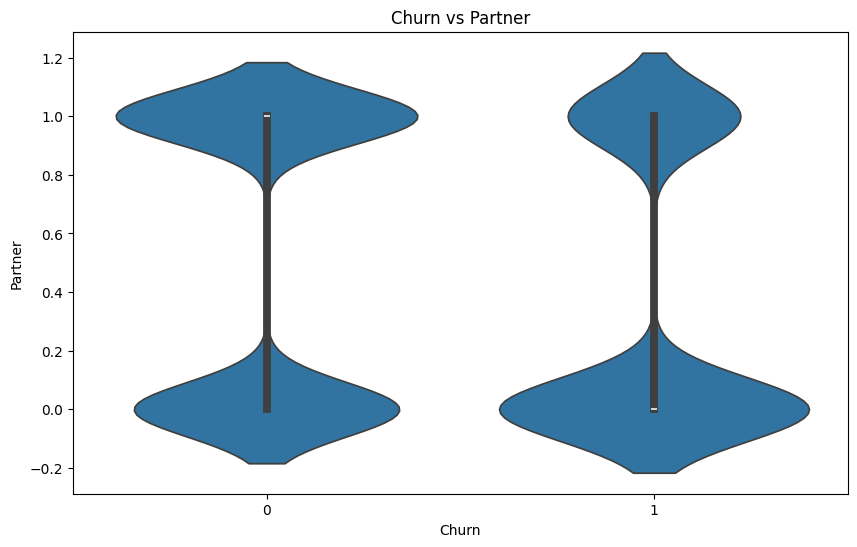

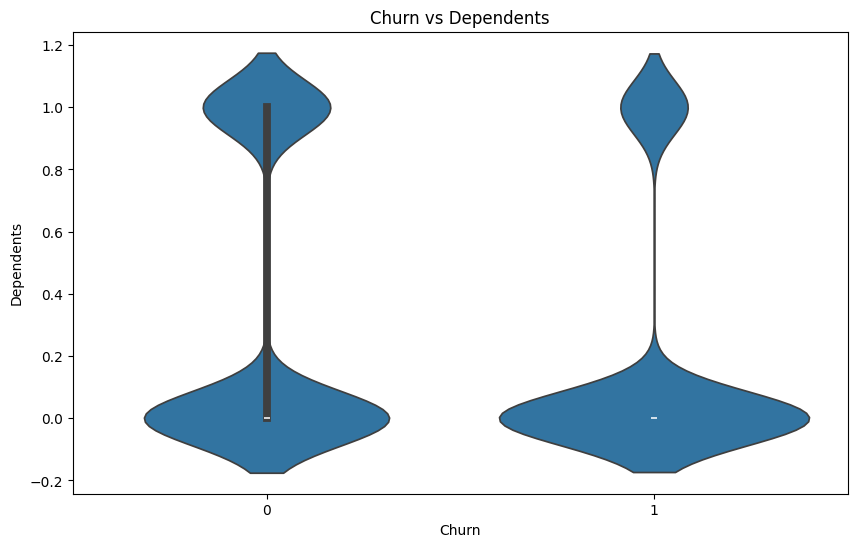

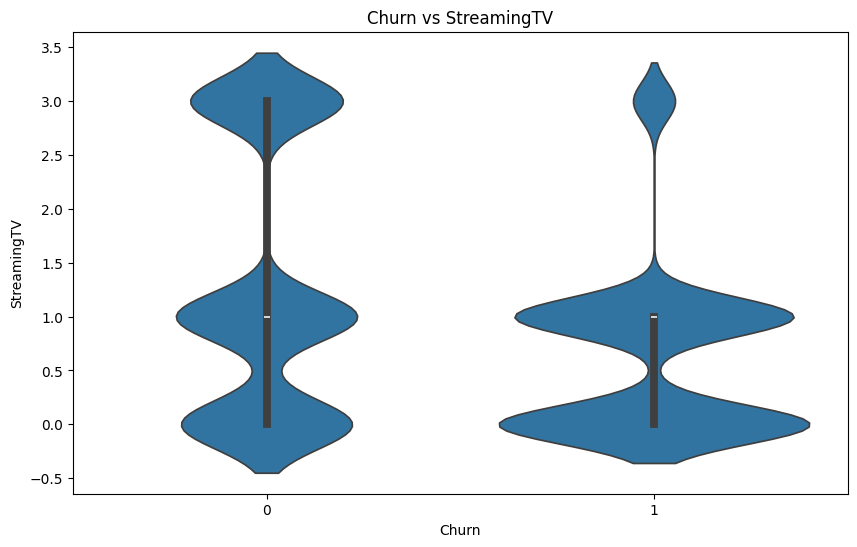

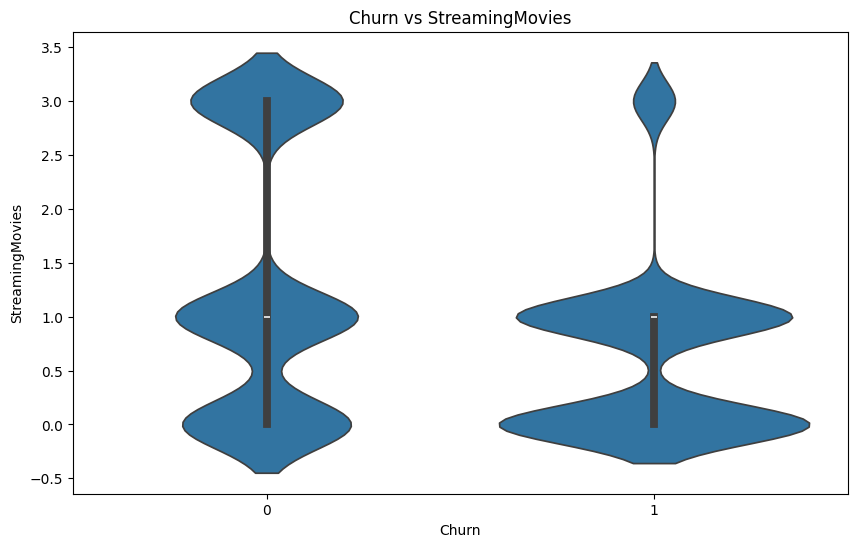

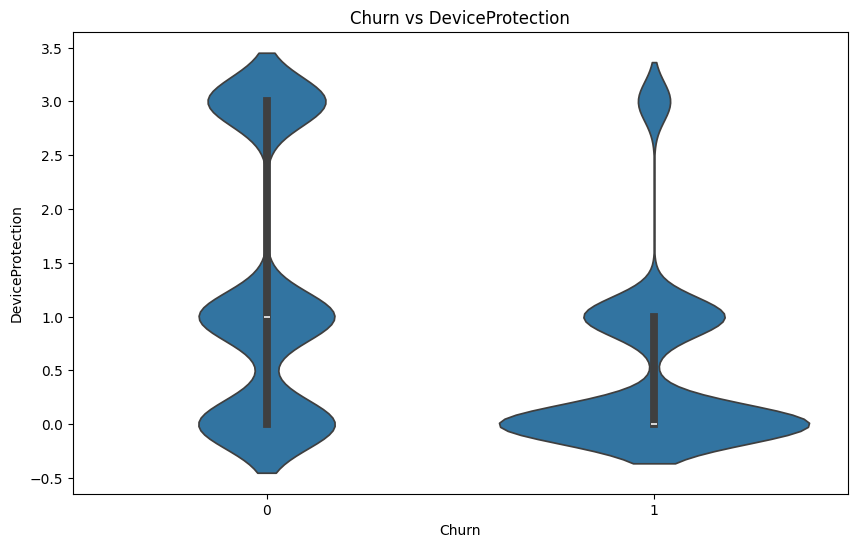

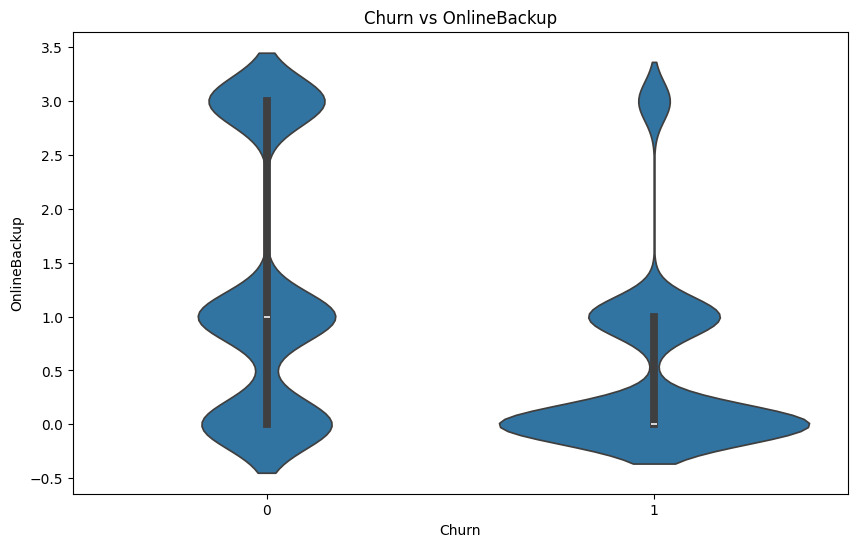

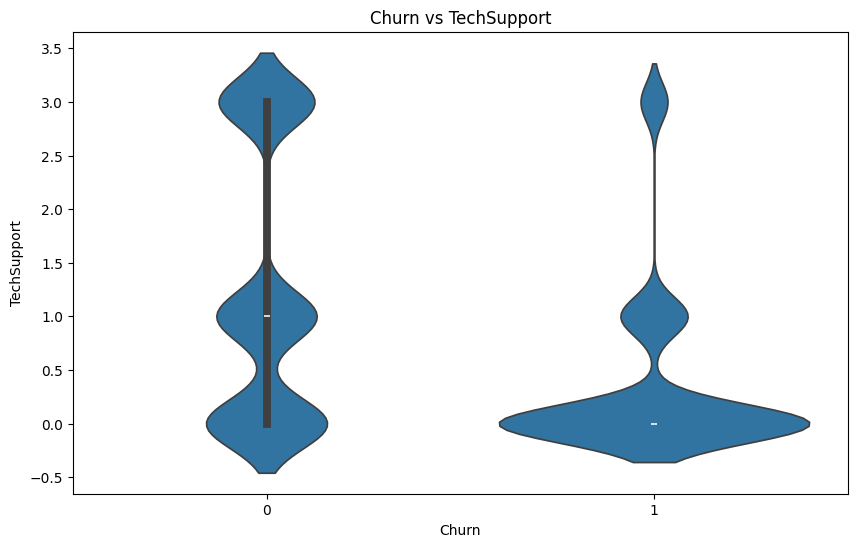

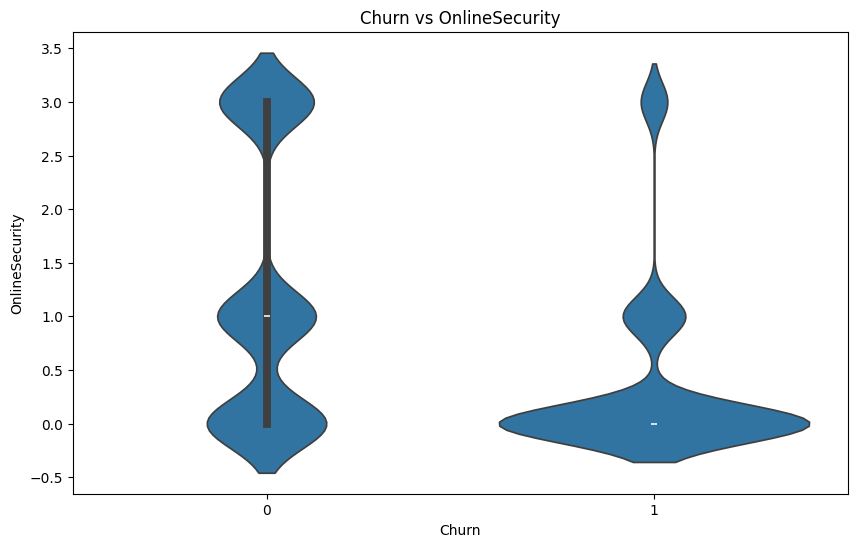

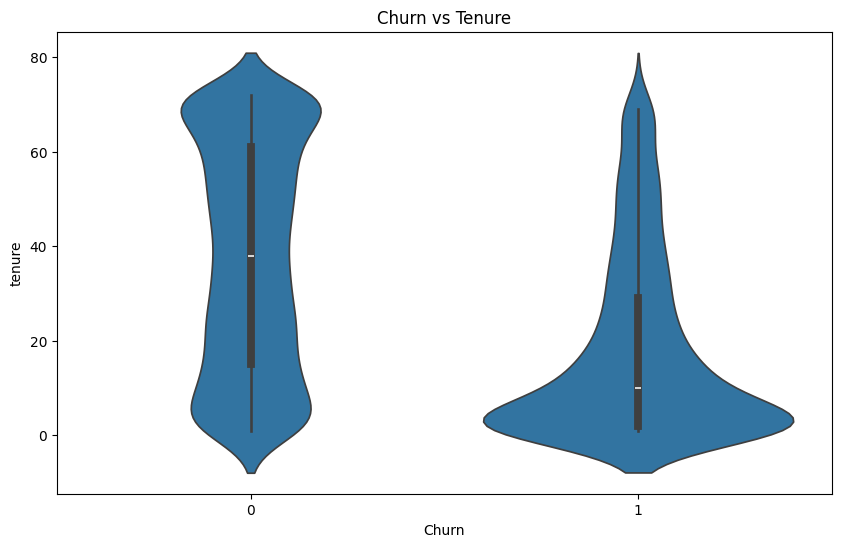

In [ ]:

# Additional visualizations for EDA using violin plots (individual plots)
plt.figure(figsize=(10, 6))
sns.violinplot(x='Churn', y='InternetService', data=df)
plt.title('Churn vs InternetService')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Churn vs MonthlyCharges')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='Churn', y='PaperlessBilling', data=df)
plt.title('Churn vs PaperlessBilling')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='Churn', y='SeniorCitizen', data=df)
plt.title('Churn vs SeniorCitizen')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='Churn', y='MultipleLines', data=df)
plt.title('Churn vs MultipleLines')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='Churn', y='PhoneService', data=df)
plt.title('Churn vs PhoneService')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='Churn', y='gender', data=df)
plt.title('Churn vs Gender')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='Churn', y='Partner', data=df)
plt.title('Churn vs Partner')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='Churn', y='Dependents', data=df)
plt.title('Churn vs Dependents')
plt.show()


plt.figure(figsize=(10, 6))
sns.violinplot(x='Churn', y='StreamingTV', data=df)
plt.title('Churn vs StreamingTV')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='Churn', y='StreamingMovies', data=df)
plt.title('Churn vs StreamingMovies')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='Churn', y='DeviceProtection', data=df)
plt.title('Churn vs DeviceProtection')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='Churn', y='OnlineBackup', data=df)
plt.title('Churn vs OnlineBackup')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='Churn', y='TechSupport', data=df)
plt.title('Churn vs TechSupport')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='Churn', y='OnlineSecurity', data=df)
plt.title('Churn vs OnlineSecurity')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='Churn', y='tenure', data=df)
plt.title('Churn vs Tenure')
plt.show()

In [ ]:

# Sweetviz report for initial EDA
# Ensure no None or NaN values in DataFrame before using Sweetviz
if df.isnull().sum().sum() == 0:
    initial_eda = sv.analyze(df)
    initial_eda.show_html('initial_eda.html')
else:
    print("Data contains missing values. Please clean the data before using Sweetviz.")

# Task 4: Splitting the dataset into training and test datasets (80/20 ratio)
train, test = train_test_split(df, test_size=0.2, random_state=42)

# Checking the shape of the datasets
print(f"\nTraining set shape: {train.shape}")
print(f"Test set shape: {test.shape}")

# Using Sweetviz to compare train and test datasets on the target variable 'Churn'
if train.isnull().sum().sum() == 0 and test.isnull().sum().sum() == 0:
    ml_eda = sv.compare([train, "Train"], [test, "Test"], "Churn")
    ml_eda.show_html('ml_eda.html')
else:
    print("Train or test set contains missing values. Please clean the data before using Sweetviz.")



                                             |          | [  0%]   00:00 -> (? left)

Report initial_eda.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.

Training set shape: (5081, 20)
Test set shape: (1271, 20)


                                             |          | [  0%]   00:00 -> (? left)

Report ml_eda.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Step Five: Identify Limitations/Issues with the Dataset
This dataset is extensive and contains numerous categorical variables. Our exploratory data analysis (EDA) involved converting these categorical features into numerical format. Additionally, we highlighted certain variables that appear to have a more substantial impact on customer churn compared to others.

One potential concern with the dataset is the correlation between variables. We observed that while some variables exhibited high correlations with churn, they did not necessarily indicate a strong relationship. Conversely, some negatively correlated variables offered valuable insights into their effects on churn. Further investigation into these variables will be essential when developing the machine learning model.